In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

## 1. Make imbalanced dataset

In [2]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=3,
                            n_clusters_per_class=1,
                            weights=[0.05, 0.10, 0.85],
                            class_sep=0.5, random_state=0)

In [3]:
Counter(y)

Counter({0: 262, 1: 510, 2: 4228})

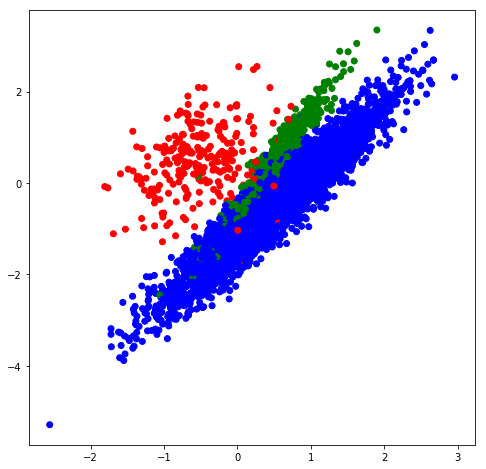

In [4]:
colors = ['red','green','blue']

fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

## 2. Make stratified train/dev dataset

In [5]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)

In [6]:
Counter(y_dev), Counter(y_test)

(Counter({0: 201, 1: 388, 2: 3411}), Counter({0: 61, 1: 122, 2: 817}))

In [7]:
np.array(list(Counter(y_dev).values())) / len(y_dev)

array([0.85275, 0.097  , 0.05025])

In [8]:
np.array(list(Counter(y_test).values())) / len(y_test)

array([0.817, 0.061, 0.122])

In [9]:
X_dev, X_test, y_dev, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42, stratify=y)

In [10]:
Counter(y_dev), Counter(y_test)

(Counter({0: 210, 1: 408, 2: 3382}), Counter({0: 52, 1: 102, 2: 846}))

In [11]:
np.array(list(Counter(y_dev).values())) / len(y_dev)

array([0.0525, 0.8455, 0.102 ])

In [12]:
np.array(list(Counter(y_test).values())) / len(y_test)

array([0.846, 0.102, 0.052])

## 3. Build model for dev dataset with under sampling

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import AllKNN

In [14]:
Counter(y_dev)

Counter({0: 210, 1: 408, 2: 3382})

In [15]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_sample(X_dev, y_dev)

In [16]:
Counter(y_resampled)

Counter({0: 210, 1: 210, 2: 210})

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score

In [18]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred,  target_names=["0","1","2"]))

Accuracy : 0.882
             precision    recall  f1-score   support

          0       0.72      0.88      0.79        52
          1       0.50      0.71      0.59       102
          2       0.96      0.90      0.93       846

avg / total       0.90      0.88      0.89      1000



In [19]:
lr = LogisticRegression()
lr.fit(X_dev, y_dev)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred, target_names=["0","1","2"]))

Accuracy : 0.93
             precision    recall  f1-score   support

          0       0.96      0.88      0.92        52
          1       0.93      0.39      0.55       102
          2       0.93      1.00      0.96       846

avg / total       0.93      0.93      0.92      1000



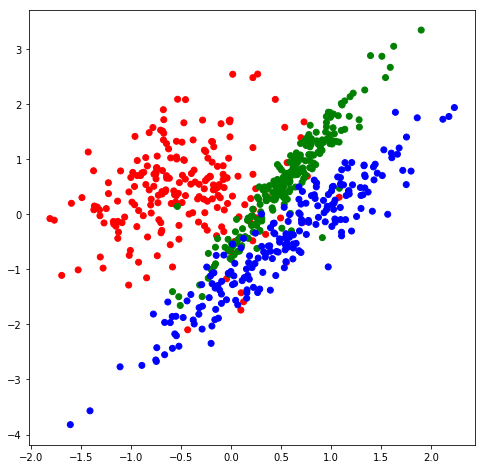

In [20]:
colors = ['red','green','blue']

fig = plt.figure(figsize=(8,8))
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=y_resampled, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

## 4. Build model for dev dataset with over sampling

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
Counter(y_dev)

Counter({0: 210, 1: 408, 2: 3382})

In [23]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_dev, y_dev)

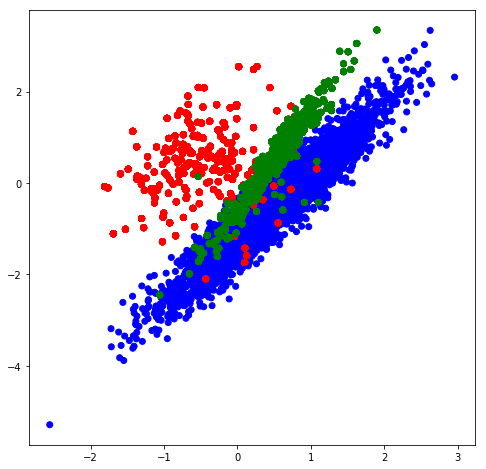

In [24]:
colors = ['red','green','blue']

fig = plt.figure(figsize=(8,8))
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=y_resampled, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [25]:
Counter(y_resampled)

Counter({0: 3382, 1: 3382, 2: 3382})

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score

In [27]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred,  target_names=["0","1","2"]))

Accuracy : 0.917
             precision    recall  f1-score   support

          0       0.70      0.90      0.79        52
          1       0.65      0.82      0.73       102
          2       0.98      0.93      0.95       846

avg / total       0.93      0.92      0.92      1000



In [28]:
lr = LogisticRegression()
lr.fit(X_dev, y_dev)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred, target_names=["0","1","2"]))

Accuracy : 0.93
             precision    recall  f1-score   support

          0       0.96      0.88      0.92        52
          1       0.93      0.39      0.55       102
          2       0.93      1.00      0.96       846

avg / total       0.93      0.93      0.92      1000



In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_sample(X_dev, y_dev)

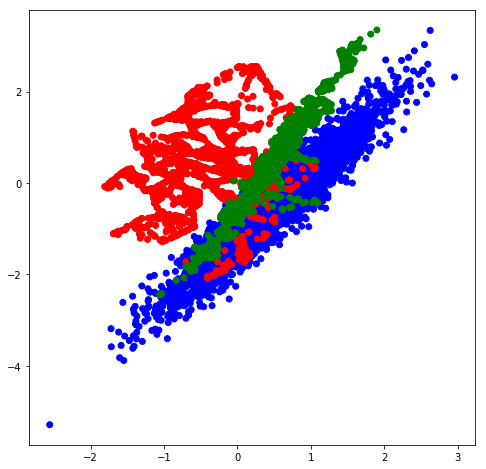

In [31]:
colors = ['red','green','blue']

fig = plt.figure(figsize=(8,8))
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=y_resampled, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [32]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred,  target_names=["0","1","2"]))

Accuracy : 0.919
             precision    recall  f1-score   support

          0       0.69      0.92      0.79        52
          1       0.66      0.85      0.74       102
          2       0.98      0.93      0.95       846

avg / total       0.93      0.92      0.92      1000



In [33]:
lr = LogisticRegression()
lr.fit(X_dev, y_dev)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred, target_names=["0","1","2"]))

Accuracy : 0.93
             precision    recall  f1-score   support

          0       0.96      0.88      0.92        52
          1       0.93      0.39      0.55       102
          2       0.93      1.00      0.96       846

avg / total       0.93      0.93      0.92      1000

